In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../Data/wcmatches.csv')
df = df.dropna(subset=['home_team', 'away_team', 'year'])
wc = pd.read_csv("../Data/worldcups.csv")
wc = wc.dropna()
time_ticks = [year for year in range(1930, 2023, 4) if year not in (1942, 1946)]

## Evolution of Team Participation in the FIFA World Cup

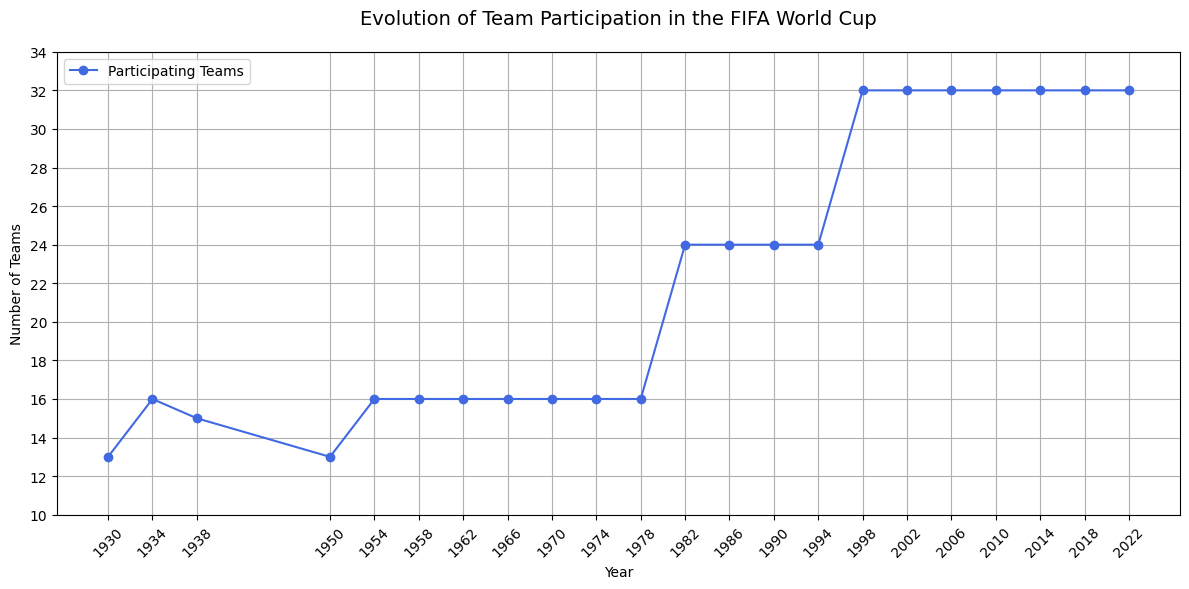

In [6]:
# Crea una colonna 'team' sia per home che per away
df_home = df[['year', 'home_team']].rename(columns={'home_team': 'team'})
df_away = df[['year', 'away_team']].rename(columns={'away_team': 'team'})

teams = pd.concat([df_home, df_away]).drop_duplicates()

#Conta quante squadre uniche per anno
unique_teams_per_year = teams.groupby('year')['team'].nunique()

# Aggiungiamo manualmente il dato mancante per il 2022 (le numero delle squadre è lo stesso del 2018)
if 2022 not in unique_teams_per_year.index:
    unique_teams_per_year.loc[2022] = unique_teams_per_year.loc[2018]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(unique_teams_per_year.index, unique_teams_per_year.values,
         marker='o', color='royalblue', label='Participating Teams')

plt.title('Evolution of Team Participation in the FIFA World Cup', fontsize=14, pad=20)
plt.xlabel('Year')
plt.ylabel('Number of Teams')

# Ticks dell'asse X, escludendo 1942 e 1946
plt.xticks(time_ticks, rotation=45)
plt.yticks(range(10, 36, 2))
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Total attendance in each World Cup

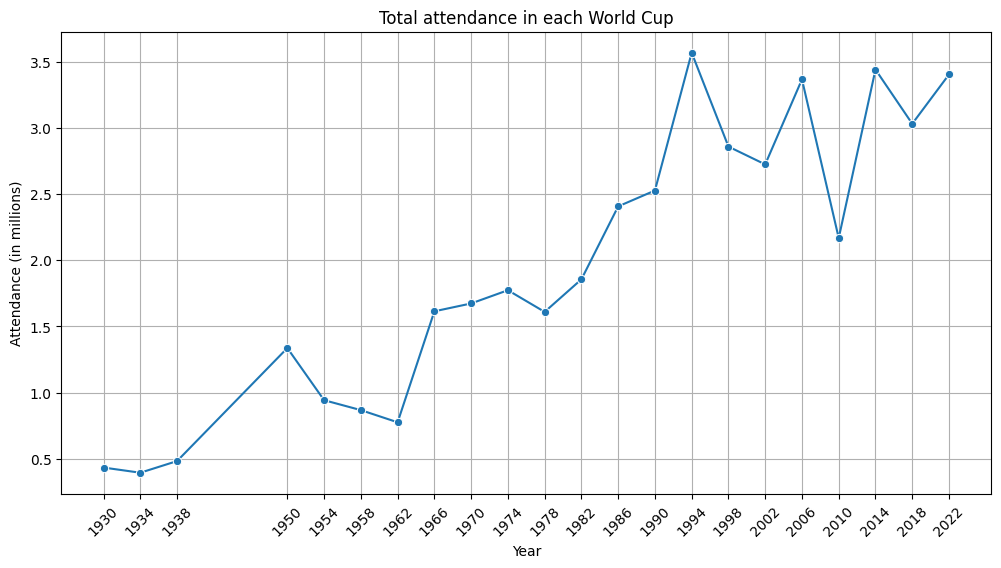

In [12]:
plt.figure(figsize=(12, 6))

# Crea una nuova colonna con i valori in milioni
wc['attendance_million'] = wc['attendance'] / 1_000_000

# Traccia il grafico con la colonna modificata
sns.lineplot(data=wc, x='year', y='attendance_million', marker='o')

plt.title('Total attendance in each World Cup')
plt.xlabel('Year')
plt.ylabel('Attendance (in millions)')
plt.xticks(time_ticks, rotation=45)
plt.grid(True)
plt.show()